# Predict Pokemon battles using Machine Learning

Import libraries

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import Datasets

In [228]:
pokemon_df = pd.read_csv("pokemon.csv")
combats_df = pd.read_csv("combats.csv")
tests_df = pd.read_csv("tests.csv")

# __`pokemon_df`__

In [229]:
pokemon_df

#                    Name    Type 1  Type 2   HP  Attack  Defense  \
0      1               Bulbasaur     Grass  Poison   45      49       49   
1      2                 Ivysaur     Grass  Poison   60      62       63   
2      3                Venusaur     Grass  Poison   80      82       83   
3      4           Mega Venusaur     Grass  Poison   80     100      123   
4      5              Charmander      Fire     NaN   39      52       43   
5      6              Charmeleon      Fire     NaN   58      64       58   
6      7               Charizard      Fire  Flying   78      84       78   
7      8        Mega Charizard X      Fire  Dragon   78     130      111   
8      9        Mega Charizard Y      Fire  Flying   78     104       78   
9     10                Squirtle     Water     NaN   44      48       65   
10    11               Wartortle     Water     NaN   59      63       80   
11    12               Blastoise     Water     NaN   79      83      100   
12    13          Mega Blastoise     Water     NaN   79     103      120   
13    14                Caterpie       Bug     NaN   45      30       35   
14    15                 Metapod       Bug     NaN   50      20       55   
15    16              Butterfree       Bug  Flying   60      45       50   
16    17                  Weedle       Bug  Poison   40      35       30   
17    18                  Kakuna       Bug  Poison   45      25       50   
18    19                Beedrill       Bug  Poison   65      90       40   
19    20           Mega Beedrill       Bug  Poison   65     150       40   
20    21                  Pidgey    Normal  Flying   40      45       40   
21    22               Pidgeotto    Normal  Flying   63      60       55   
22    23                 Pidgeot    Normal  Flying   83      80       75   
23    24            Mega Pidgeot    Normal  Flying   83      80       80   
24    25                 Rattata    Normal     NaN   30      56       35   
25    26                Raticate    Normal     NaN   55      81       60   
26    27                 Spearow    Normal  Flying   40      60       30   
27    28                  Fearow    Normal  Flying   65      90       65   
28    29                   Ekans    Poison     NaN   35      60       44   
29    30                   Arbok    Poison     NaN   60      85       69   
..   ...                     ...       ...     ...  ...     ...      ...   
770  771                 Sylveon     Fairy     NaN   95      65       65   
771  772                Hawlucha  Fighting  Flying   78      92       75   
772  773                 Dedenne  Electric   Fairy   67      58       57   
773  774                 Carbink      Rock   Fairy   50      50      150   
774  775                   Goomy    Dragon     NaN   45      50       35   
775  776                 Sliggoo    Dragon     NaN   68      75       53   
776  777                  Goodra    Dragon     NaN   90     100       70   
777  778                  Klefki     Steel   Fairy   57      80       91   
778  779                Phantump     Ghost   Grass   43      70       48   
779  780               Trevenant     Ghost   Grass   85     110       76   
780  781  Pumpkaboo Average Size     Ghost   Grass   49      66       70   
781  782    Pumpkaboo Small Size     Ghost   Grass   44      66       70   
782  783    Pumpkaboo Large Size     Ghost   Grass   54      66       70   
783  784    Pumpkaboo Super Size     Ghost   Grass   59      66       70   
784  785  Gourgeist Average Size     Ghost   Grass   65      90      122   
785  786    Gourgeist Small Size     Ghost   Grass   55      85      122   
786  787    Gourgeist Large Size     Ghost   Grass   75      95      122   
787  788    Gourgeist Super Size     Ghost   Grass   85     100      122   
788  789                Bergmite       Ice     NaN   55      69       85   
789  790                 Avalugg       Ice     NaN   95     117      184   
790  791                  Noibat    Flying  Dragon   40

#### Print shape of pokemon_df

In [230]:
pokemon_df.shape

(800, 12)

In [231]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


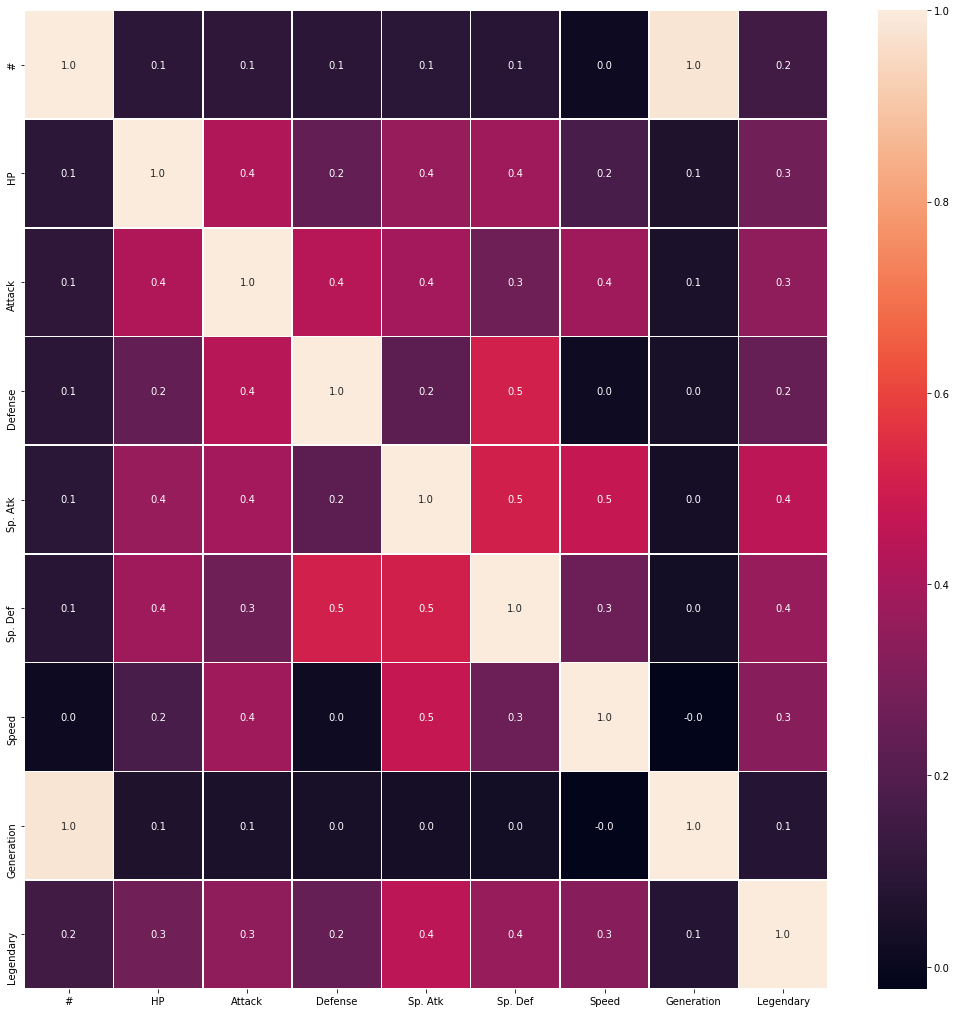

In [232]:
f, ax = plt.subplots(figsize =(18, 18))
sns.heatmap(pokemon_df.corr(), annot=True, linewidth=.5, fmt= '.1f',ax=ax)

plt.show()

In [233]:
pokemon_df.corr()

#        HP    Attack   Defense   Sp. Atk   Sp. Def  \
#           1.000000  0.097712  0.102664  0.094691  0.089199  0.085596   
HP          0.097712  1.000000  0.422386  0.239622  0.362380  0.378718   
Attack      0.102664  0.422386  1.000000  0.438687  0.396362  0.263990   
Defense     0.094691  0.239622  0.438687  1.000000  0.223549  0.510747   
Sp. Atk     0.089199  0.362380  0.396362  0.223549  1.000000  0.506121   
Sp. Def     0.085596  0.378718  0.263990  0.510747  0.506121  1.000000   
Speed       0.012181  0.175952  0.381240  0.015227  0.473018  0.259133   
Generation  0.983428  0.058683  0.051451  0.042419  0.036437  0.028486   
Legendary   0.154336  0.273620  0.345408  0.246377  0.448907  0.363937   

               Speed  Generation  Legendary  
#           0.012181    0.983428   0.154336  
HP          0.175952    0.058683   0.273620  
Attack      0.381240    0.051451   0.345408  
Defense     0.015227    0.042419   0.246377  
Sp. Atk     0.473018    0.036437   0.448907  
Sp. Def     0.259133    0.028486   0.363937  
Speed       1.000000   -0.023121   0.326715  
Generation -0.023121    1.000000   0.079794  
Legendary   0.326715    0.079794   1.000000

## As you can see, generation and lengendary columns do not have much to do with and of the other data, so we decided to not use these 2 columns with our dataset

## Removing the Generation and Lengendary columns since they are irrelavent to pokemon combat wins

In [234]:
features = ['#', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

print(pokemon_df[features])


       #    Type 1  Type 2   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0      1     Grass  Poison   45      49       49       65       65     45
1      2     Grass  Poison   60      62       63       80       80     60
2      3     Grass  Poison   80      82       83      100      100     80
3      4     Grass  Poison   80     100      123      122      120     80
4      5      Fire     NaN   39      52       43       60       50     65
5      6      Fire     NaN   58      64       58       80       65     80
6      7      Fire  Flying   78      84       78      109       85    100
7      8      Fire  Dragon   78     130      111      130       85    100
8      9      Fire  Flying   78     104       78      159      115    100
9     10     Water     NaN   44      48       65       50       64     43
10    11     Water     NaN   59      63       80       65       80     58
11    12     Water     NaN   79      83      100       85      105     78
12    13     Water     NaN   79     10

## Removing all the NaN values and replacing it with None

In [235]:
pokemon_update_df = pokemon_df.where((pd.notnull(pokemon_df)), None)
pokemon_update_df[features]

#    Type 1  Type 2   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0      1     Grass  Poison   45      49       49       65       65     45
1      2     Grass  Poison   60      62       63       80       80     60
2      3     Grass  Poison   80      82       83      100      100     80
3      4     Grass  Poison   80     100      123      122      120     80
4      5      Fire    None   39      52       43       60       50     65
5      6      Fire    None   58      64       58       80       65     80
6      7      Fire  Flying   78      84       78      109       85    100
7      8      Fire  Dragon   78     130      111      130       85    100
8      9      Fire  Flying   78     104       78      159      115    100
9     10     Water    None   44      48       65       50       64     43
10    11     Water    None   59      63       80       65       80     58
11    12     Water    None   79      83      100       85      105     78
12    13     Water    None   79     103      120      135      115     78
13    14       Bug    None   45      30       35       20       20     45
14    15       Bug    None   50      20       55       25       25     30
15    16       Bug  Flying   60      45       50       90       80     70
16    17       Bug  Poison   40      35       30       20       20     50
17    18       Bug  Poison   45      25       50       25       25     35
18    19       Bug  Poison   65      90       40       45       80     75
19    20       Bug  Poison   65     150       40       15       80    145
20    21    Normal  Flying   40      45       40       35       35     56
21    22    Normal  Flying   63      60       55       50       50     71
22    23    Normal  Flying   83      80       75       70       70    101
23    24    Normal  Flying   83      80       80      135       80    121
24    25    Normal    None   30      56       35       25       35     72
25    26    Normal    None   55      81       60       50       70     97
26    27    Normal  Flying   40      60       30       31       31     70
27    28    Normal  Flying   65      90       65       61       61    100
28    29    Poison    None   35      60       44       40       54     55
29    30    Poison    None   60      85       69       65       79     80
..   ...       ...     ...  ...     ...      ...      ...      ...    ...
770  771     Fairy    None   95      65       65      110      130     60
771  772  Fighting  Flying   78      92       75       74       63    118
772  773  Electric   Fairy   67      58       57       81       67    101
773  774      Rock   Fairy   50      50      150       50      150     50
774  775    Dragon    None   45      50       35       55       75     40
775  776    Dragon    None   68      75       53       83      113     60
776  777    Dragon    None   90     100       70      110      150     80
777  778     Steel   Fairy   57      80       91       80       87     75
778  779     Ghost   Grass   43      70       48       50       60     38
779  780     Ghost   Grass   85     110       76       65       82     56
780  781     Ghost   Grass   49      66       70       44       55     51
781  782     Ghost   Grass   44      66       70       44       55     56
782  783     Ghost   Grass   54      66       70       44       55     46
783  784     Ghost   Grass   59      66       70       44       55     41
784  785     Ghost   Grass   65      90      122       58       75     84
785  786     Ghost   Grass   55      85      122       58       75     99
786  787     Ghost   Grass   75      95      122       58       75     69
787  788     Ghost   Grass   85     100      122       58       75     54
788  789       Ice    None   55      69       85       32       35     28
789  790       Ice    None   95     117      184       44       46     28
790  791    Flying  Dragon   40      30       35       45       40     55
791  792    Flying  Dragon   85      70       80       97       80    123
792  793   

In [236]:
pokemon_update_df[features].isnull().sum()

#            0
Type 1       0
Type 2     386
HP           0
Attack       0
Defense      0
Sp. Atk      0
Sp. Def      0
Speed        0
dtype: int64

## Scatter plots to show Attack & Defense as well as Special Attack & Defense

setting the graph size to be large so it will be easier to see

In [298]:
fig_size = plt.rcParams['figure.figsize']
print(fig_size)
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams['figure.figsize'] = fig_size

[15.0, 10.0]


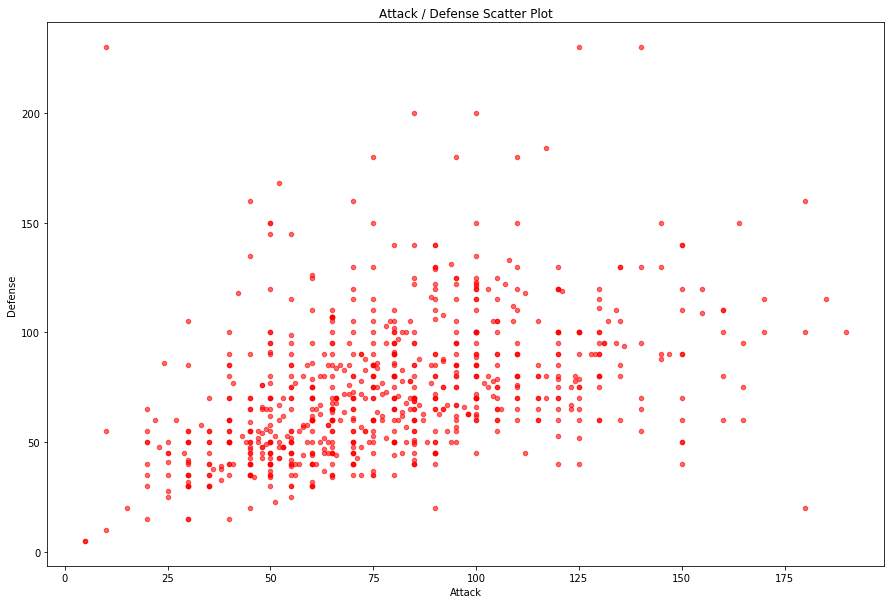

In [299]:
pokemon_update_df.plot(kind='scatter', x='Attack', y='Defense', alpha=.6, color='red')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack / Defense Scatter Plot')

plt.show()

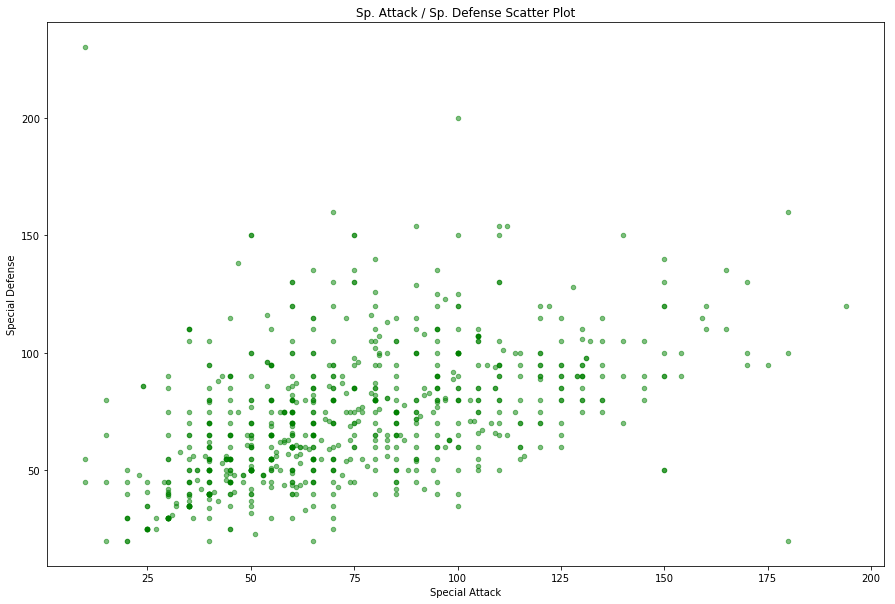

In [292]:
pokemon_update_df.plot(kind='scatter', x='Sp. Atk', y='Sp. Def', alpha=.5, color='green')
plt.xlabel('Special Attack')
plt.ylabel('Special Defense')

plt.title('Sp. Attack / Sp. Defense Scatter Plot')

plt.show()

In [293]:
combats_df

First_pokemon  Second_pokemon  Winner
0                266             298     298
1                702             701     701
2                191             668     668
3                237             683     683
4                151             231     151
5                657             752     657
6                192             134     134
7                 73             545     545
8                220             763     763
9                302              31      31
10               442             130     130
11               701             624     701
12                15             283     283
13               151              87     151
14               269             462     269
15               763             448     448
16               143             263     263
17               365             240     240
18               499             774     499
19               563             578     563
20               440             687     687
21               373             441     441
22               654             671     671
23               121             355     121
24               609             649     649
25               270             708     270
26               460             568     568
27               626             767     767
28               139             451     139
29               694             747     694
...              ...             ...     ...
49970            500             789     500
49971             10             785     785
49972            194             117     194
49973            258             420     420
49974            455             762     455
49975            760             358     358
49976            283             176     283
49977            778             380     380
49978            732             214     732
49979            540             233     540
49980             62              25      25
49981             41             520     520
49982            636             290     636
49983            599             484     484
49984            126             425     425
49985            799             513     513
49986            606              24      24
49987            293             448     448
49988             35             714     714
49989            603             559     603
49990            204             368     368
49991            695             717     717
49992            592             703     703
49993            728             762     728
49994            657             681     681
49995            707             126     707
49996            589             664     589
49997            303             368     368
49998            109              89     109
49999              9              73       9

[50000 rows x 3 columns]

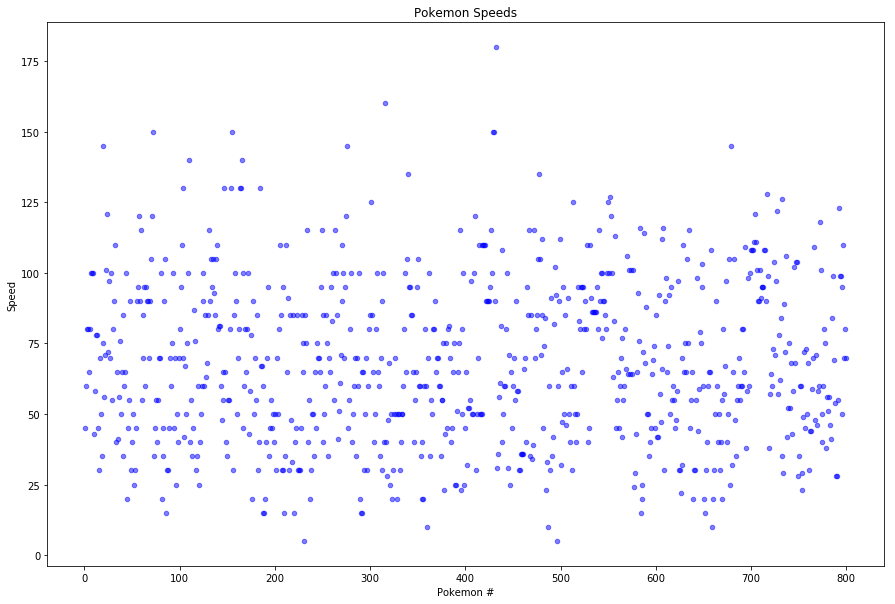

In [296]:
pokemon_update_df.plot(kind='scatter', x='#', y='Speed', alpha=.5, color='blue')
plt.xlabel('Pokemon #')
plt.ylabel('Speed')

plt.title('Pokemon Speeds')

plt.show()

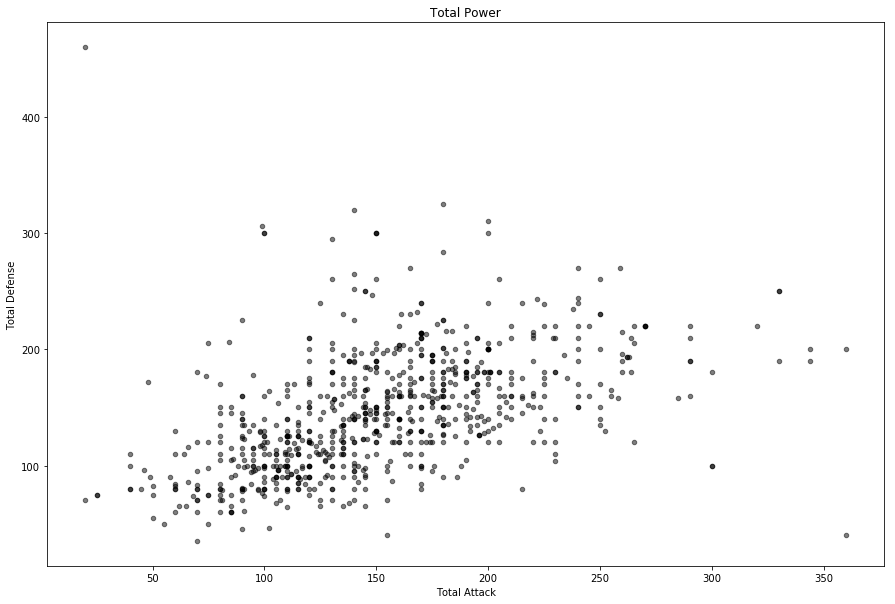

In [297]:
total_attack = pokemon_update_df['Attack'] + pokemon_update_df['Sp. Atk']
total_defense = pokemon_update_df['Defense'] + pokemon_update_df['Sp. Def']


stat_df = pd.concat([total_attack, total_defense], axis=1)

stat.plot(kind='scatter', x=0, y=1, alpha=.5, color='black')
plt.xlabel('Total Attack')
plt.ylabel('Total Defense')

plt.title('Total Power')

plt.show()

## Renaming 'First_pokemon' to '#' to combine 2 dataframes

In [303]:
#result = pd.concat([pokemon_update_df, combats_df], axis=1, join_axes=['#'])
combats_df = combats_df.rename(columns={'First_pokemon': '#', 'Second_pokemon': 'Battle Pokemon'})
combats_df

#  Battle Pokemon  Winner
0      266             298     298
1      702             701     701
2      191             668     668
3      237             683     683
4      151             231     151
5      657             752     657
6      192             134     134
7       73             545     545
8      220             763     763
9      302              31      31
10     442             130     130
11     701             624     701
12      15             283     283
13     151              87     151
14     269             462     269
15     763             448     448
16     143             263     263
17     365             240     240
18     499             774     499
19     563             578     563
20     440             687     687
21     373             441     441
22     654             671     671
23     121             355     121
24     609             649     649
25     270             708     270
26     460             568     568
27     626             767     767
28     139             451     139
29     694             747     694
...    ...             ...     ...
49970  500             789     500
49971   10             785     785
49972  194             117     194
49973  258             420     420
49974  455             762     455
49975  760             358     358
49976  283             176     283
49977  778             380     380
49978  732             214     732
49979  540             233     540
49980   62              25      25
49981   41             520     520
49982  636             290     636
49983  599             484     484
49984  126             425     425
49985  799             513     513
49986  606              24      24
49987  293             448     448
49988   35             714     714
49989  603             559     603
49990  204             368     368
49991  695             717     717
49992  592             703     703
49993  728             762     728
49994  657             681     681
49995  707             126     707
49996  589             664     589
49997  303             368     368
49998  109              89     109
49999    9              73       9

[50000 rows x 3 columns]

## Testing merge with both dataframes

In [304]:
result = pd.merge(pokemon_update_df[features], combats_df, on="#", how='left')
result

# Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0        1  Grass  Poison  45      49       49       65       65     45   
1        1  Grass  Poison  45      49       49       65       65     45   
2        1  Grass  Poison  45      49       49       65       65     45   
3        1  Grass  Poison  45      49       49       65       65     45   
4        1  Grass  Poison  45      49       49       65       65     45   
5        1  Grass  Poison  45      49       49       65       65     45   
6        1  Grass  Poison  45      49       49       65       65     45   
7        1  Grass  Poison  45      49       49       65       65     45   
8        1  Grass  Poison  45      49       49       65       65     45   
9        1  Grass  Poison  45      49       49       65       65     45   
10       1  Grass  Poison  45      49       49       65       65     45   
11       1  Grass  Poison  45      49       49       65       65     45   
12       1  Grass  Poison  45      49       49       65       65     45   
13       1  Grass  Poison  45      49       49       65       65     45   
14       1  Grass  Poison  45      49       49       65       65     45   
15       1  Grass  Poison  45      49       49       65       65     45   
16       1  Grass  Poison  45      49       49       65       65     45   
17       1  Grass  Poison  45      49       49       65       65     45   
18       1  Grass  Poison  45      49       49       65       65     45   
19       1  Grass  Poison  45      49       49       65       65     45   
20       1  Grass  Poison  45      49       49       65       65     45   
21       1  Grass  Poison  45      49       49       65       65     45   
22       1  Grass  Poison  45      49       49       65       65     45   
23       1  Grass  Poison  45      49       49       65       65     45   
24       1  Grass  Poison  45      49       49       65       65     45   
25       1  Grass  Poison  45      49       49       65       65     45   
26       1  Grass  Poison  45      49       49       65       65     45   
27       1  Grass  Poison  45      49       49       65       65     45   
28       1  Grass  Poison  45      49       49       65       65     45   
29       1  Grass  Poison  45      49       49       65       65     45   
...    ...    ...     ...  ..     ...      ...      ...      ...    ...   
49986  800   Fire   Water  80     110      120      130       90     70   
49987  800   Fire   Water  80     110      120      130       90     70   
49988  800   Fire   Water  80     110      120      130       90     70   
49989  800   Fire   Water  80     110      120      130       90     70   
49990  800   Fire   Water  80     110      120      130       90     70   
49991  800   Fire   Water  80     110      120      130       90     70   
49992  800   Fire   Water  80     110      120      130       90     70   
49993  800   Fire   Water  80     110      120      130       90     70   
49994  800   Fire   Water  80     110      120      130       90     70   
49995  800   Fire   Water  80     110      120      130       90     70   
49996  800   Fire   Water  80     110      120      130       90     70   
49997  800   Fire   Water  80     110      120      130       90     70   
49998  800   Fire   Water  80     110      120      130       90     70   
49999  800   Fire   Water  80     110      120      130       90     70   
50000  800   Fire   Water  80     110      120      130       90     70   
50001  800   Fire   Water  80     110      120      130       90     70   
50002  800   Fire   Water  80     110      120      130       90     70   
50003  800   Fire   Water  80     110      120      130       90     70   
50004  800   Fire   Water  80     110      120      130       90     70   
50005  800   Fire   Water  80     110      120      130       90     70   
50006  800   Fire   Water  80     110      120      130       90     70   
50007  800   Fire   Water  80     

In [305]:
result.isnull().sum()

#                     0
Type 1                0
Type 2            24039
HP                    0
Attack                0
Defense               0
Sp. Atk               0
Sp. Def               0
Speed                 0
Battle Pokemon       16
Winner               16
dtype: int64

## Lambda to show number of won or loss battles

In [306]:
won_df = lambda x: combats_df[(combats_df["#"] == x) & (combats_df["Winner"] == x)]
won_df

matches_won_df = lambda x: combats_df[ ( (combats_df["#"] == x) | (combats_df["Battle Pokemon"] == x) )  & (combats_df["Winner"] == x) ]

In [307]:
lost_to_df = lambda x: combats_df[(combats_df["#"] == x) & (combats_df["Winner"] != x)]
lost_to_df

matches_loss_df = lambda x: combats_df[ ( (combats_df["#"] == x) | (combats_df["Battle Pokemon"] == x) )  & (combats_df["Winner"] != x) ]

In [308]:
for k in range(len(pokemon_df)):
#    print(lost_to_df(k))
    print(matches_won_df(k))

Empty DataFrame
Columns: [#, Battle Pokemon, Winner]
Index: []
         #  Battle Pokemon  Winner
3057   199               1       1
4154     1             194       1
4830   215               1       1
4883     1             285       1
5425     1             579       1
8156     1             324       1
8570     1             385       1
8897   558               1       1
9409   302               1       1
10837    1             779       1
14076    1             684       1
15256   94               1       1
16855  433               1       1
17502  456               1       1
17823  620               1       1
18494  211               1       1
20067  667               1       1
20853    1             215       1
22652  323               1       1
23387  374               1       1
25510  382               1       1
26251  433               1       1
27356    1             302       1
27453   50               1       1
28155  215               1       1
29302  762               1 

         #  Battle Pokemon  Winner
603    566              34      34
1274   615              34      34
5341    34             126      34
5825   435              34      34
5960    34             670      34
6577   766              34      34
7979   601              34      34
8189    97              34      34
8755    34             180      34
9459    34             593      34
10086  128              34      34
11128  743              34      34
12149  593              34      34
12483  450              34      34
12534  762              34      34
19191  743              34      34
20278   34             399      34
20333  197              34      34
21251  196              34      34
22090   34              64      34
22921   34             197      34
23350  289              34      34
24280  369              34      34
24500   34              87      34
24774  182              34      34
26827   34             412      34
28295  147              34      34
28784  324          

         #  Battle Pokemon  Winner
256    132              69      69
383     69             302      69
3687     5              69      69
5240    69             186      69
7540    69             547      69
8502   558              69      69
8655   130              69      69
10096  739              69      69
11025   69             525      69
11027   69             296      69
12067   69             525      69
14364   69             489      69
14370  489              69      69
17625  735              69      69
17815   48              69      69
20958   69               4      69
23875  300              69      69
24467  250              69      69
27775   69             637      69
28790  116              69      69
28966  271              69      69
29998  170              69      69
32097  177              69      69
32323  684              69      69
33353  382              69      69
35386   69             759      69
37297  199              69      69
37850  323          

         #  Battle Pokemon  Winner
511    252             108     108
1532   108             577     108
1773   108              99     108
3523   408             108     108
4585   108             203     108
6014   108             364     108
6574   364             108     108
9972   434             108     108
10349  447             108     108
12625  108             504     108
12638  108              95     108
12812   88             108     108
13511   74             108     108
13947  630             108     108
14575  108              54     108
15002  405             108     108
15400  108             416     108
16344  434             108     108
17342  108             417     108
18960  226             108     108
20611  573             108     108
21925  108             246     108
22558  108             123     108
22880  108             781     108
24684  150             108     108
24788  108             578     108
25278  407             108     108
26041  640          

         #  Battle Pokemon  Winner
1535   143             459     143
4296   491             143     143
4596   143             379     143
4773   143              89     143
6954   143             240     143
7005   143             728     143
7359   143             211     143
7571   637             143     143
7937    82             143     143
8000   143             609     143
8360   143             617     143
10501  143             688     143
11510  211             143     143
15405  143             653     143
15471  143             243     143
15804  194             143     143
17555  143             433     143
18016  143             733     143
18924  143             642     143
20049  143             267     143
20498  143             739     143
21381  665             143     143
21476  321             143     143
21757  143              18     143
23360  143             591     143
24119  143             113     143
24321  143             346     143
25079  107          

         #  Battle Pokemon  Winner
895     15             182     182
8557   382             182     182
11661  132             182     182
18747  586             182     182
19541  485             182     182
22749  182              45     182
22999  182             360     182
28330  290             182     182
28991  182              52     182
32357   81             182     182
37001  182             190     182
39242  652             182     182
48485  789             182     182
Empty DataFrame
Columns: [#, Battle Pokemon, Winner]
Index: []
         #  Battle Pokemon  Winner
32     208             184     184
183    513             184     184
394    184             197     184
757    278             184     184
957    520             184     184
1165   184              53     184
1907   520             184     184
2252   184             115     184
2380   766             184     184
2606   644             184     184
2872   383             184     184
3438   184             440 

         #  Battle Pokemon  Winner
3355   685             222     222
4831   222             719     222
6653   222             680     222
6679   355             222     222
13729  105             222     222
14127  222              96     222
16798  602             222     222
17472  317             222     222
18841  207             222     222
22476  751             222     222
22593  447             222     222
25244  222             176     222
25281  222             121     222
25497  222             652     222
28951  321             222     222
29033  238             222     222
32513  222             459     222
32636  222             644     222
34849  388             222     222
36005   73             222     222
40062   35             222     222
42300  222             237     222
44441  222             173     222
45802  386             222     222
46990  485             222     222
47945  222              49     222
         #  Battle Pokemon  Winner
1440   137          

         #  Battle Pokemon  Winner
247    257             221     257
668    354             257     257
1781   257             447     257
1908    68             257     257
2180   201             257     257
2724   257              96     257
2743   257             111     257
2881   719             257     257
3158   257             168     257
3930   257             215     257
4069   257             695     257
4194   625             257     257
4391   257             385     257
4440   190             257     257
4713   257              42     257
6418   413             257     257
6728   630             257     257
7008   374             257     257
9372    39             257     257
9450   257             506     257
9508   257             569     257
10248  257              91     257
11048  267             257     257
11374  645             257     257
12782  253             257     257
13447  257             399     257
13657  257             591     257
14750  257          

         #  Battle Pokemon  Winner
1107   295             290     295
3967    89             295     295
6235   374             295     295
6269   400             295     295
8058   224             295     295
9023   295             641     295
9946   277             295     295
9964   295             457     295
10111  662             295     295
12133  256             295     295
12790  399             295     295
14167   74             295     295
14645  149             295     295
16776  295             762     295
17761  593             295     295
18806  295             733     295
22589  295             579     295
25228  334             295     295
28695  290             295     295
29067  295             241     295
33425  295             237     295
33590  578             295     295
36353  386             295     295
39832   81             295     295
39891  295             644     295
40287  295             176     295
40810  256             295     295
41601  295          

         #  Battle Pokemon  Winner
1200   333             221     333
1406   333              58     333
1633   197             333     333
2355    87             333     333
2370    82             333     333
2791   208             333     333
3002    98             333     333
3464   323             333     333
3947   333             155     333
5096   447             333     333
7081   333             204     333
7295   333             491     333
7297   333             258     333
7432    14             333     333
9452   333             733     333
9951   205             333     333
12358  333             457     333
13045   16             333     333
13570  333             510     333
13975   27             333     333
14257  588             333     333
14782  679             333     333
14909  333             193     333
15954  769             333     333
16312  222             333     333
17092   37             333     333
17376  333             167     333
19104  333          

         #  Battle Pokemon  Winner
1063   369             447     369
1888   667             369     369
2455   369             602     369
8326   333             369     369
8575   229             369     369
9824   457             369     369
10103  369             578     369
10944  369              42     369
11252  369             351     369
13323  369             660     369
13335  369             237     369
14042  369             669     369
14392  369             637     369
15895  369              15     369
16489  369             143     369
16607  369             208     369
18099  369             434     369
18781   21             369     369
18814  678             369     369
20634  369             195     369
21137  369             641     369
21751  369             312     369
21903  369             218     369
22562  369             670     369
23172  241             369     369
23437  369             211     369
24577  319             369     369
24996  319          

         #  Battle Pokemon  Winner
324    408             404     404
2194   211             404     404
4275   404             374     404
13800  404             226     404
15006  750             404     404
16727  685             404     404
18645  644             404     404
19304  404             267     404
20536  333             404     404
20592  360             404     404
21495  404             669     404
21767  404             516     404
22038  404             391     404
22486  334             404     404
22527  404             346     404
24879  404              69     404
28906  404             640     404
29476  761             404     404
30181  386             404     404
31959  404             491     404
32299  404             167     404
34192  400             404     404
34716  585             404     404
35353  404             365     404
37608  404             459     404
43983  404             240     404
44734  404              87     404
45506  208          

         #  Battle Pokemon  Winner
21     373             441     441
43      76             441     441
480    441               1     441
2673   734             441     441
5409   391             441     441
5622   441             211     441
6015   182             441     441
6797   208             441     441
7792   281             441     441
8946   441             683     441
10427  315             441     441
10516    3             441     441
11675  441              45     441
11942  441             379     441
11949  441             319     441
13830  151             441     441
13875  578             441     441
13951  640             441     441
14209  292             441     441
14774  441             113     441
14885   51             441     441
15841  317             441     441
17325  441             599     441
18637  441             763     441
19093  665             441     441
20627  211             441     441
21701  485             441     441
22052  441          

         #  Battle Pokemon  Winner
591     75             480     480
658    634             480     480
2718   548             480     480
3244   260             480     480
3422   129             480     480
5125   181             480     480
6790   440             480     480
7263   383             480     480
8553   129             480     480
8835   480             266     480
9351   784             480     480
9548   204             480     480
9670   480             211     480
9994   450             480     480
10529  175             480     480
10584  312             480     480
10709  480             222     480
11028   76             480     480
11352  669             480     480
11455   77             480     480
11633  480             645     480
12162  395             480     480
12481  480             743     480
13136  480             380     480
14619  480             569     480
15447  207             480     480
15541  319             480     480
16555  480          

         #  Battle Pokemon  Winner
231    512             586     512
378    749             512     512
745    512             100     512
752    350             512     512
766    512             205     512
1322   512             476     512
2232   512             727     512
2269   585             512     512
2566    88             512     512
2975   512             292     512
4325   791             512     512
4476   203             512     512
4990   512             187     512
5711   512              57     512
7066   563             512     512
7317   442             512     512
11278  512             748     512
12183  475             512     512
13857  289             512     512
15094  512             791     512
15622  512             729     512
16964  318             512     512
17801  342             512     512
17864  208             512     512
20055  465             512     512
20160  512             273     512
20174  512             348     512
20355  512          

[74 rows x 3 columns]
         #  Battle Pokemon  Winner
88     546             530     546
249    546             333     546
677    546             416     546
1279   546             181     546
2163   738             546     546
2510   546             224     546
2610   359             546     546
3248   262             546     546
3746   546             596     546
4339   546             411     546
5220   127             546     546
5346   546             668     546
5709   546             400     546
7466   719             546     546
7514   668             546     546
7908     5             546     546
8700   120             546     546
8824    43             546     546
8932   546             303     546
9179   546             289     546
9506   388             546     546
10036  604             546     546
10078   67             546     546
10483  744             546     546
10856  546             530     546
13017   15             546     546
13189  567             546     54

         #  Battle Pokemon  Winner
610    582             666     582
2330   582             388     582
2474   582             564     582
2524    83             582     582
4002   256             582     582
5487   582             530     582
6006   582             666     582
6282   582             293     582
6543   582             348     582
6991   255             582     582
8042   582             332     582
9599   582             756     582
9849   582              96     582
10845  389             582     582
11962  582             686     582
12801  582             753     582
13539  582             584     582
14051  354             582     582
14471  778             582     582
14805  582             253     582
15631  582             347     582
16180   53             582     582
16815  582             788     582
16846  582             318     582
16957  582             693     582
17366  373             582     582
18118  582             620     582
18121  582          

         #  Battle Pokemon  Winner
3157   644             620     620
4138   620             363     620
4533   214             620     620
5048   620             789     620
6116   654             620     620
6130   180             620     620
6203   292             620     620
6389   763             620     620
7412   620             360     620
7422   766             620     620
7986   620              49     620
8253   620             390     620
11389  331             620     620
12485  297             620     620
12924  463             620     620
13450  790             620     620
13979  675             620     620
16839  620             772     620
16958  743             620     620
17665  231             620     620
18558   83             620     620
20681  620             772     620
20986  356             620     620
20999  620             594     620
22495  341             620     620
23263  173             620     620
24100  620             445     620
28273  620          

         #  Battle Pokemon  Winner
1553   659             769     659
2014   561             659     659
3196   110             659     659
5499   607             659     659
5598   440             659     659
5620   659             607     659
6869   489             659     659
7916   659             131     659
9829   764             659     659
10731  281             659     659
17995  496             659     659
19085  659             452     659
24891  659             204     659
25818  488             659     659
31440  192             659     659
33276  496             659     659
34548  223             659     659
35741  296             659     659
41127  324             659     659
43970  659             111     659
49361  659              77     659
49476  575             659     659
         #  Battle Pokemon  Winner
685    146             660     660
1360   219             660     660
2083   424             660     660
3012   302             660     660
5885   281          

         #  Battle Pokemon  Winner
457    763             685     685
657    208             685     685
1962   339             685     685
2203   379             685     685
2714   242             685     685
3564   455             685     685
4982   449             685     685
5307   363             685     685
6051   429             685     685
6686   596             685     685
8079   685             241     685
8130   354             685     685
8981   685             323     685
9081   391             685     685
9488   140             685     685
10014  641             685     685
11521  685             653     685
11728  168             685     685
13315  254             685     685
13402  685              49     685
13406  575             685     685
14357  685              89     685
17391   11             685     685
18798  736             685     685
19364   53             685     685
20858  685             295     685
20964  685             724     685
21406  714          

         #  Battle Pokemon  Winner
159    734             718     718
210    538             718     718
1126   671             718     718
1479   718             675     718
2400   462             718     718
2472   461             718     718
4771   128             718     718
4965   637             718     718
5124    94             718     718
7904   718             584     718
8969   718             495     718
9019   718             594     718
9703   718             758     718
10196   54             718     718
10378  718             346     718
10461   96             718     718
10687  718             736     718
11103  718             187     718
11485  349             718     718
12494  712             718     718
12857  718             520     718
13151   42             718     718
13312  718             695     718
13627  443             718     718
13820  359             718     718
14278  718             256     718
14303  718             271     718
14687  718          

         #  Battle Pokemon  Winner
922    305             752     752
3023   311             752     752
3771   663             752     752
3821   482             752     752
4131   265             752     752
9222   624             752     752
9921   752              54     752
10633  184             752     752
11210  752             411     752
11232  595             752     752
11689  634             752     752
11705  644             752     752
11849   64             752     752
11901   85             752     752
12201  224             752     752
13704  357             752     752
15703  752             238     752
16134  458             752     752
18527   44             752     752
19555  752             695     752
19589  320             752     752
20135  573             752     752
20164  577             752     752
20425  752             669     752
20456  239             752     752
21056  215             752     752
21980  123             752     752
22228  752          

         #  Battle Pokemon  Winner
178    199             785     785
1134   785             218     785
1754   785             386     785
2076   785             780     785
2601   785             617     785
2750   785             796     785
2761   762             785     785
2772   785              81     785
3566   517             785     785
3690   785             194     785
3900   785             650     785
4229   335             785     785
4537    54             785     785
5994   230             785     785
6108   785             725     785
6831   670             785     785
7667   639             785     785
8031    59             785     785
8546   681             785     785
8988   493             785     785
9093   785             285     785
9099   388             785     785
10004  211             785     785
10611  451             785     785
11046  407             785     785
11346  785             188     785
11369  555             785     785
11888  785          

In [309]:
win_count = combats_df['Winner'].value_counts()
print (win_count.head())

163    152
154    136
438    136
428    134
432    133
Name: Winner, dtype: int64


In [310]:
for k in range(len(pokemon_df)):
#    print(lost_to_df(k))
    print(matches_loss_df(k))

Empty DataFrame
Columns: [#, Battle Pokemon, Winner]
Index: []
         #  Battle Pokemon  Winner
426      1             679     679
442    732               1     732
480    441               1     441
995      1             687     687
1040     1             557     557
1446     1             766     766
1889     1             153     153
2368   574               1     574
4759     1             604     604
5826   106               1     106
6417     1             717     717
6572     1             381     381
7510     1              54      54
8368   600               1     600
9201   427               1     427
9342     1             493     493
9439     1             115     115
10678  396               1     396
10801    1             351     351
11164  357               1     357
11646  426               1     426
11982    1             488     488
12210    1             503     503
13190    1             483     483
13457  509               1     509
15176    1             372 

[61 rows x 3 columns]
         #  Battle Pokemon  Winner
213     14             103     103
368     14              62      62
533    632              14     632
841     14             162     162
1495    14             612     612
2284   726              14     726
2416    14             175     175
2540   279              14     279
3640   261              14     261
3659    31              14      31
3774    14             732     732
4135    64              14      64
4211    14              92      92
4315   658              14     658
5117    14             169     169
5172   357              14     357
6827    14             541     541
7042   412              14     412
7127   566              14     566
7128    22              14      22
7432    14             333     333
7438    14             420     420
8072   783              14     783
8102    14              84      84
8443   263              14     263
8468    14             570     570
9205   756              14     75

         #  Battle Pokemon  Winner
372     29             431     431
434    453              29     453
1732   622              29     622
1941   212              29     212
2061   736              29     736
2340    29             495     495
3083    29             307     307
4878    29             350     350
4942   748              29     748
5161   331              29     331
5730    29              68      68
6301   537              29     537
6945   338              29     338
7125    29             642     642
8097    29             174     174
8348    29             630     630
10098  175              29     175
11357   29             756     756
11730   29             261     261
13031  794              29     794
13118   26              29      26
13781  776              29     776
14112   29             438     438
14403   29             465     465
14564  648              29     648
14975   29             658     658
16063   29             465     465
16505   29          

         #  Battle Pokemon  Winner
63     606              40     606
74     712              40     712
1583   534              40     534
1902    40             674     674
1968    40             649     649
2060    40             475     475
2674    40             715     715
3675    40             467     467
3682   581              40     581
3977    40             614     614
4080    40             747     747
4534    40              93      93
5226    40             536     536
6760    40             469     469
7036    40             674     674
7090    40             588     588
7684    40             365     365
8301   534              40     534
10000  518              40     518
12077   40              57      57
12932  209              40     209
14717  713              40     713
14831   40             115     115
15980   40             464     464
16034   40             478     478
17368  703              40     703
17868  180              40     180
18872   40          

         #  Battle Pokemon  Winner
116     54             115     115
143     54             119     119
151     54              32      32
271     54             532     532
699     54             600     600
809    549              54     549
902     54             214     214
943    102              54     102
981    291              54     291
1407    54             244     244
1845   755              54     755
2235   622              54     622
3093    54             358     358
3294    54              72      72
3421   571              54     571
3574    54             153     153
3634   800              54     800
4537    54             785     785
5227   109              54     109
5627    54             254     254
5717    54             246     246
6908    54             467     467
6934    54             200     200
7025    68              54      68
7249    54             196     196
8093   508              54     508
8211   520              54     520
8265    54          

         #  Battle Pokemon  Winner
512     69             212     212
1188    69             368     368
1737    69             508     508
2893   429              69     429
3334    69             113     113
3394   472              69     472
4673   209              69     209
4714   238              69     238
5253    69             125     125
5401    69             526     526
5922    69             593     593
6791    69             191     191
7076   217              69     217
7696    69             586     586
8383   619              69     619
8705   251              69     251
8750    69             347     347
9570    69             676     676
10493  790              69     790
10630  651              69     651
10896   69              96      96
10982  324              69     324
11299   69             425     425
11594  329              69     329
11647  301              69     301
12032  188              69     188
12257  676              69     676
13872  522          

         #  Battle Pokemon  Winner
3565    84              44      44
8065   274              84     274
13719  745              84     745
13985   84             430     430
14360  697              84     697
15626  477              84     477
16592  430              84     430
18148   84             608     608
19462   84             550     550
20488  544              84     544
21821   84             714     714
22951   84             159     159
26509  643              84     643
27446   28              84      28
28685   84             307     307
29011  272              84     272
31025  572              84     572
32262   84             793     793
34208   84             465     465
40346   84             264     264
41099  772              84     772
41533   84             438     438
43943   84             487     487
44094  709              84     709
44530  426              84     426
46537   57              84      57
47704   84             264     264
48950  528          

         #  Battle Pokemon  Winner
1398    95             446     446
2636   568              95     568
3332   314              95     314
3538    95             192     192
3883   481              95     481
5691    95             397     397
6434    67              95      67
7052    95             467     467
7546   212              95     212
7714    95             467     467
9489    95             603     603
10242  708              95     708
10271   95             541     541
11359  163              95     163
11501   95             548     548
12036   95             212     212
12638  108              95     108
12772   95             603     603
13501  141              95     141
13988   95             206     206
14016   95             382     382
14605  184              95     184
15206  537              95     537
15208  702              95     702
16117   95             799     799
18962   59              95      59
21662  588              95     588
21670  154          

         #  Battle Pokemon  Winner
223    611             107     611
292    107              48      48
502    142             107     142
642    107              32      32
1047   107             213     213
1182   107             711     711
1695   107             773     773
2444   730             107     730
2806   107             155     155
3286   107             536     536
3715   547             107     547
4180   107             745     745
4914   107             435     435
5002   780             107     780
5651   107             448     448
6264   107             710     710
7194   107             597     597
7868   107             690     690
8324   107             705     705
8528   107              99      99
8581    16             107      16
9626   107             428     428
9897   107             570     570
10806  148             107     148
12334   60             107      60
14339  107             359     359
15140  383             107     383
15159  107          

         #  Battle Pokemon  Winner
390    120              67      67
779    120             256     256
1499   230             120     230
2392   120             603     603
2627   120             674     674
3149   120             389     389
3701   267             120     267
4158   544             120     544
4518   120             116     116
4736   383             120     383
5447   601             120     601
5580   446             120     446
6792   120             754     754
8363   120             309     309
8416   120             337     337
8589   377             120     377
8700   120             546     546
8926   228             120     228
9366   778             120     778
10467  781             120     781
11240  229             120     229
11289  120             353     353
11924  530             120     530
12576   63             120      63
12778  531             120     531
15023  120             610     610
16113  343             120     343
16160  426          

         #  Battle Pokemon  Winner
1440   137             223     223
1670   701             137     701
3081   137              85      85
4566   418             137     418
6463   137             576     576
7340   137             679     679
7497   414             137     414
7969   165             137     165
11421  137             505     505
13575  137             704     704
13912  137             684     684
14279  137             537     537
14713  137             172     172
16088  137             531     531
17599  682             137     682
20490  533             137     533
21136  137              63      63
23817  137             526     526
24928  137               7       7
25146  524             137     524
28205  137             193     193
29387  137             606     606
30469  137             685     685
31966  135             137     135
32614  137             205     205
32942  137             611     611
34247  773             137     773
34520  552          

         #  Battle Pokemon  Winner
1558   151             126     126
1946   151             498     498
1950    31             151      31
3349   151             254     254
3725    92             151      92
5497   129             151     129
6722   151             727     727
7597   737             151     737
7874   760             151     760
8710   562             151     562
9091   119             151     119
9123   151             778     778
9302   151             101     101
9447   151             541     541
9634   151             206     206
10624   48             151      48
11577  151             382     382
11690  797             151     797
12829  151             219     219
12858  151             725     725
13830  151             441     441
14584  672             151     672
14920  100             151     100
16884  550             151     550
17188  151             610     610
17534  151             476     476
17693  151             622     622
17773  151          

         #  Battle Pokemon  Winner
68     169             701     701
1169   431             169     431
2296   212             169     212
2942   438             169     438
3253   169             541     541
3262   169             205     205
5049   614             169     614
8895   169             212     212
10430  169             792     792
10475  169             498     498
10789  234             169     234
11992  724             169     724
14391  265             169     265
18381  169             336     336
18745   23             169      23
20834  169             710     710
24451  697             169     697
25631  169             513     513
26033  169             554     554
27144  437             169     437
27463  169             785     785
29837  169              65      65
32000  259             169     259
32101  495             169     495
33249  169             794     794
33952  453             169     453
34935  588             169     588
35411  169          

         #  Battle Pokemon  Winner
1916   185             394     394
2034   185             366     366
2497   132             185     132
3107   185             316     316
4013   185             216     216
4265   132             185     132
4375   527             185     527
5101   185             540     540
5998   185             552     552
8723   156             185     156
9293   701             185     701
9444   586             185     586
9678   156             185     156
12666  185             557     557
16622  576             185     576
16730  663             185     663
18477  185             141     141
18488  185             428     428
19876  553             185     553
20319  795             185     795
21857  539             185     539
22500  383             185     383
22780  185             414     414
23467  185             428     428
23690  185              53      53
23752  185             765     765
25198  568             185     568
30331  541          

         #  Battle Pokemon  Winner
178    199             785     785
385    488             199     488
459    509             199     509
1026   498             199     498
1635   160             199     160
2312   199             376     376
2751   550             199     550
2990   234             199     234
3057   199               1       1
4442   199              21      21
4593   167             199     167
8753   199             650     650
9600   740             199     740
9787   199              92      92
9832   364             199     364
9957   334             199     334
9967   199             263     263
11445  155             199     155
12207  199             154     154
12258  199             562     562
13007  199             499     499
13097  199             157     157
13147  199             121     121
14165  388             199     388
15424  334             199     334
16221  199             474     474
16291  199             421     421
16528  199          

         #  Battle Pokemon  Winner
60     509             217     509
283    217             100     100
926    217             628     628
1009   567             217     567
1190    29             217      29
1387   574             217     574
1511   217             250     250
2658   217              32      32
2719   339             217     339
3272   759             217     759
4323   217             413     413
4429   217             336     336
4680   362             217     362
4815   217             213     213
4833   217             180     180
5208   217             524     524
6484   696             217     696
6942   217             559     559
7331   217               3       3
8151   217             435     435
8829   217             350     350
9797   549             217     549
9811   217             712     712
10676  217             670     670
11463  217             488     488
11597  217             100     100
12071  217             245     245
12132  101          

         #  Battle Pokemon  Winner
1674   271             229     271
1765   437             229     437
2030   153             229     153
2494   229             798     798
3737   233             229     233
3978   229             133     133
5333   229             628     628
5940   229             606     606
8575   229             369     369
8620   451             229     451
9429   229              85      85
10649  229             580     580
11314  229             115     115
12025  288             229     288
12236  229              95      95
13130  229             710     710
13707  229             699     699
16927  229              31      31
17500  409             229     409
17575  229             773     773
18206  229             370     370
18338  671             229     671
19025  229             158     158
21319  229             476     476
23889  368             229     368
26516  147             229     147
28568  229             213     213
30145  229          

         #  Battle Pokemon  Winner
576    244             177     177
3330   147             244     147
3480   169             244     169
4348   554             244     554
4852   700             244     700
5164   651             244     651
6305   629             244     629
7173   466             244     466
7252   232             244     232
8232   244             707     707
9021   646             244     646
9191   680             244     680
9218   423             244     423
9899   193             244     193
10133  244              13      13
11800  244             407     407
13706  496             244     496
14147  244             409     409
14375  193             244     193
14551  583             244     583
14890  527             244     527
15118  244             140     140
15188  244             679     679
16043  244             792     792
17658  244             424     424
18289  244             704     704
18735  503             244     503
19305  306          

         #  Battle Pokemon  Winner
2307   540             257     540
3679   257             390     390
6705   490             257     490
6825     8             257       8
6935   565             257     565
7335   257             135     135
7346   115             257     115
7918   257              84      84
7936   257             786     786
9557   536             257     536
10454  257             616     616
10635  406             257     406
10640   93             257      93
12276  257             634     634
12395  125             257     125
12709  257             100     100
12881  702             257     702
13280  257              92      92
13716  257             608     608
14050  257             729     729
15291  154             257     154
15658  466             257     466
16297  677             257     677
17010  692             257     692
18286  257             682     682
18340  343             257     343
18544  257             715     715
19403  421          

         #  Battle Pokemon  Winner
165    275             155     155
2226   275             147     147
13358   96             275      96
18342  275             163     163
21071  275             332     332
35120  354             275     354
36178  275             553     553
44518  275             461     461
47364  340             275     340
         #  Battle Pokemon  Winner
20184  330             276     330
25055   45             276      45
26573  430             276     430
32599  276              72      72
35185   45             276      45
42993  796             276     796
44671  276             797     797
         #  Battle Pokemon  Winner
646    277             168     168
1316   559             277     559
1341   168             277     168
2357   277             560     560
2423   694             277     694
3099   647             277     647
3229   277             451     451
3832   277             530     530
7473   232             277     232
7628   277          

         #  Battle Pokemon  Winner
647    285             328     328
1053   285              44      44
1378   444             285     444
2660   505             285     505
4221   285             552     552
4522   285             692     692
4761   715             285     715
4883     1             285       1
4899   285             216     216
4972   285             146     146
5205   285              27      27
6104   285             340     340
6983   719             285     719
7117   285             199     199
8600   285             185     185
9093   785             285     785
10459  285             232     232
10912  285             483     483
12114  101             285     101
12221  772             285     772
12974  285             557     557
13606  341             285     341
14641   93             285      93
14812  285             756     756
15909  285             792     792
16186  285             239     239
16786  285             173     173
17554  285          

42926  430             301     430
         #  Battle Pokemon  Winner
9      302              31      31
383     69             302      69
720    541             302     541
871    274             302     274
1149   364             302     364
2290   478             302     478
2515   302             228     228
3012   302             660     660
3397   501             302     501
3756   302             259     259
5016    26             302      26
6576   745             302     745
7825   542             302     542
8245   302             433     433
8544   302             314     314
8913   302             340     340
9409   302               1       1
10323  302             163     163
11316  302             212     212
13305  526             302     526
14625  701             302     701
18040  302             570     570
19928  302              85      85
19957  302             423     423
21779  590             302     590
22557  700             302     700
22973  302          

         #  Battle Pokemon  Winner
462    310              48      48
800    310             153     153
1143   638             310     638
1323   310             138     138
1396   310             469     469
2004   310             647     647
2552   310             407     407
3144   310             726     726
3153   310             414     414
3726   768             310     768
4054   690             310     690
4379   310             570     570
4787   310              83      83
5100    55             310      55
5381   310             494     494
5407   492             310     492
5934   197             310     197
6061   600             310     600
6770   310             317     317
7972   310             216     216
8001   310             223     223
8516   621             310     621
10374  199             310     199
11347  677             310     677
11798  384             310     384
13114  310             776     776
13519  310             712     712
14300  446          

         #  Battle Pokemon  Winner
5169   314             717     717
6646   314               8       8
9642   314             165     165
13085  314             625     625
13413  314             390     390
16560  314              44      44
16959  745             314     745
29003  314               9       9
30061  314             428     428
31982  314              85      85
32317  314             766     766
33149  314             100     100
33861  314             700     700
37397  314             717     717
44182  732             314     732
45411  314             138     138
45891  139             314     139
         #  Battle Pokemon  Winner
186    137             315     137
1148   315             115     115
1803   315              16      16
1810   672             315     672
1997   587             315     587
3114   315             244     244
4422   315             676     676
4561   315             580     580
5984   315              32      32
7536   602          

         #  Battle Pokemon  Winner
1209   328              39      39
1538   328             625     625
2130   328             789     789
2326   328             393     393
2675     7             328       7
4724   328             562     562
4726   328             650     650
5290   328              36      36
5328   328             341     341
5597   328             200     200
6752   328             446     446
7213   155             328     155
7258   328             201     201
7507   328             283     283
8135   328             186     186
9734    99             328      99
10728  711             328     711
10842  328              82      82
12212  520             328     520
12447  328             149     149
12743  328              20      20
12868  446             328     446
12931  328             611     611
14822  537             328     537
15192  328              30      30
15199  328             709     709
16867  628             328     628
16966  328          

         #  Battle Pokemon  Winner
580    340             110     110
1206   424             340     424
2840   340             114     114
6750   252             340     252
7771   340             517     517
9168   376             340     376
17768  653             340     653
17775  340             362     362
24723  653             340     653
40312  496             340     496
45846  340             311     311
         #  Battle Pokemon  Winner
5020   341             798     798
12755  341              23      23
15060  341             434     434
15441  677             341     677
17380  341             679     679
21842  341             633     633
22495  341             620     620
24516  341             713     713
24850  341             428     428
25026   32             341      32
25613  341             120     120
28419  341             684     684
29432  139             341     139
30568  341              28      28
32938  114             341     114
32986  154          

         #  Battle Pokemon  Winner
675    260             358     260
1707   358             707     707
2443   519             358     519
2713   438             358     438
2911   547             358     547
4070   349             358     349
4855   264             358     264
5221   705             358     705
5484   358             793     793
6878   358             204     204
7448   358             276     276
10185  358             606     606
10552  708             358     708
12195  358             748     748
12970  358             790     790
14196  686             358     686
14510  368             358     368
15281   20             358      20
16038  358             130     130
17259   67             358      67
17460  356             358     356
18442  248             358     248
19178  358             503     503
20551  358             163     163
21326  632             358     632
23285  703             358     703
25293  611             358     611
25822  103          

         #  Battle Pokemon  Winner
825     19             369      19
851    369             505     505
906    369             392     392
1507   369              63      63
1684   800             369     800
2039   369             679     679
2966   369             581     581
3409   369             129     129
3667   369             544     544
3668   369             317     317
3999   369             611     611
4077   369             590     590
5553   369             572     572
5759   429             369     429
6585   369             727     727
7153   369             523     523
9982    28             369      28
9986   369             411     411
10064  690             369     690
11197  369             537     537
11409  369             727     727
11574  369             242     242
11742  369             474     474
12631  369             438     438
13594  255             369     255
14396  369              13      13
15457  768             369     768
15744  410          

         #  Battle Pokemon  Winner
21     373             441     441
298    373             128     128
691    579             373     579
2516   778             373     778
2988   275             373     275
3220   373             157     157
3779   373             443     443
4290   557             373     557
4589   373             650     650
5535   373             254     254
5587   373             629     629
6124   373             116     116
6772   362             373     362
7097   133             373     133
7154   373               8       8
7226   373              67      67
7905   177             373     177
8209   432             373     432
9252   475             373     475
9287   373             548     548
9658   542             373     542
11456  134             373     134
11784  373             361     361
12327  373             464     464
12393  373             342     342
12433  638             373     638
12458  679             373     679
13683   80          

         #  Battle Pokemon  Winner
568    588             390     588
836    425             390     425
886    390             747     747
1147   390             439     439
1752   396             390     396
2770   540             390     540
2914   390             644     644
2917   390             137     137
3066   390             332     332
3895   390             478     478
4960   417             390     417
6659   390              98      98
6768   390             737     737
6823   673             390     673
7947   390             402     402
8253   620             390     620
8533   390             741     741
9608   390             339     339
10416  248             390     248
10437  390             553     553
10651   53             390      53
10705  390             217     217
11138  259             390     259
12019  390             428     428
12632   15             390      15
12710  390             490     490
12766  390             175     175
13352  644          

         #  Battle Pokemon  Winner
45     475             400     475
112    400             341     341
164    483             400     483
696    305             400     305
846    400             151     151
1464   400             214     214
2812   746             400     746
3366   400             508     508
4150   400             265     265
5041   400             521     521
5114   400             202     202
5709   546             400     546
6267   616             400     616
6269   400             295     295
6562   755             400     755
7863   400             177     177
8791   646             400     646
9385   400             393     393
9507   438             400     438
9684   171             400     171
9983   119             400     119
10750  400             658     658
10767  400             262     262
11427  400             509     509
12338  400             710     710
12911  400             340     340
13592   55             400      55
13670  400          

         #  Battle Pokemon  Winner
1092   232             405     232
1681   405             232     232
1948   341             405     341
1991   405             338     338
2492   405             336     336
3040   475             405     475
3551   431             405     431
4825   155             405     155
4906   518             405     518
6658   405             279     279
7284   405             581     581
8178   405             157     157
9066   467             405     467
9280   405             740     740
9707   476             405     476
10177  320             405     320
10866  405             230     230
11007   55             405      55
11642  177             405     177
11791  521             405     521
11964  405             610     610
12546  161             405     161
13863  405             138     138
15002  405             108     108
15908  405             657     657
16059  326             405     326
17288   43             405      43
18240  405          

         #  Battle Pokemon  Winner
2480   427             188     188
5861   427             188     188
21539  427             165     165
36444  739             427     739
43906  163             427     163
46249  164             427     164
47753  740             427     740
         #  Battle Pokemon  Winner
1616   494             428     494
6137   428             481     481
7522   540             428     540
7624   428             704     704
8894   349             428     349
14197  635             428     635
16991  428             499     499
18196  428             614     614
19477  540             428     540
20479  428             494     494
23651  428             614     614
24023  428             737     737
24307  428             349     349
24332  499             428     499
29784  428              44      44
31696  364             428     364
32605  428             554     554
38235  438             428     438
49045  428             339     339
         #  Battle P

         #  Battle Pokemon  Winner
95     436             701     701
97     436             603     603
103    436              40      40
2553   554             436     554
4273   611             436     611
4318   436             401     401
5938   128             436     128
5958   436             499     499
6021   745             436     745
6228   436             721     721
8746   756             436     756
8917   610             436     610
9058   426             436     426
10528  274             436     274
11735  436             223     223
13062  371             436     371
13453  436             794     794
14893  462             436     462
16140  436             432     432
16553  436             571     571
18883  138             436     138
19029  212             436     212
19218  436             265     265
21486  436             748     748
21758  303             436     303
21969  345             436     345
23010  606             436     606
24151  436          

         #  Battle Pokemon  Winner
920    441             337     337
1060   268             441     268
2572   441             361     361
4117   441             581     581
4264   444             441     444
4320   422             441     422
6188   766             441     766
6867   708             441     708
7235   441             692     692
7616   441             229     229
9593   701             441     701
9974   441             348     348
11840  441              68      68
13273  441             357     357
14462  441             431     431
15487  603             441     603
15873  441             158     158
16393  441             507     507
16976  441             336     336
17421  441             129     129
18597  441             436     436
18603  494             441     494
18983  657             441     657
19399  410             441     410
19726  142             441     142
21306  441             565     565
21425  172             441     172
22553  441          

         #  Battle Pokemon  Winner
586    458             301     301
633    699             458     699
767    268             458     268
2399   458             666     666
2780   230             458     230
2817   367             458     367
3043   458             553     553
4433   458              84      84
5455   458             197     197
7545   425             458     425
7588   458             783     783
8491   458              27      27
9377    42             458      42
9490   195             458     195
9510    13             458      13
11082  271             458     271
12280  458             159     159
12930  105             458     105
13155  258             458     258
13311  417             458     417
14629  105             458     105
14986  458             383     383
15633  710             458     710
15782  573             458     573
15849  417             458     417
15960  458             394     394
16134  458             752     752
16251  539          

         #  Battle Pokemon  Winner
2641   467             477     477
19917  430             467     430
21601  467             727     727
22873  467             727     727
26959  467             608     608
31492  467             432     432
34184  467             472     472
35266  467              59      59
38145  792             467     792
38194  467             276     276
43205  717             467     717
48583  467             432     432
         #  Battle Pokemon  Winner
747    646             468     646
948    468             342     342
1270   468             551     551
3193   138             468     138
3881   468             351     351
4516   468             525     525
4783   468             663     663
4823    19             468      19
4842   410             468     410
5138   468             328     328
5798   468             508     508
6152   468             511     511
6494   380             468     380
6666   468             638     638
6685   468          

         #  Battle Pokemon  Winner
375    492              37      37
489    528             492     528
590    116             492     116
612    492             417     417
842    570             492     570
1312   492             216     216
1481   338             492     338
1846    42             492      42
1932   524             492     524
2320   492             553     553
2547   706             492     706
3054   492             258     258
3095   492             611     611
5029   772             492     772
5044   492             114     114
5473   472             492     472
6531   492             523     523
7191   692             492     692
7500   466             492     466
8825   539             492     539
9623   492             261     261
9722   492             284     284
9807   492              93      93
10016  380             492     380
10210  145             492     145
10415  174             492     174
10972  492              20      20
11918  492          

         #  Battle Pokemon  Winner
1121   503             662     662
1847   503             706     706
5567   503             709     709
6881   503             699     699
8866   503             623     623
10316  166             503     166
11300  503             275     275
11365  542             503     542
11466  503             674     674
15454  280             503     280
16341  481             503     481
16414  503             428     428
16960  503             478     478
17313  430             503     430
18401  503             412     412
19370  503              26      26
23575   71             503      71
27245  503             263     263
27461  503              28      28
31285   80             503      80
32932  503             398     398
32950  503             332     332
34874  360             503     360
36442  503             786     786
37483  503             349     349
38211  503               7       7
38586  503             438     438
40921  797          

         #  Battle Pokemon  Winner
519    528             327     327
949    528             794     794
5697   557             528     557
6254   528             798     798
13873  528             691     691
15592  705             528     705
15999  249             528     249
16206   59             528      59
18646  103             528     103
23989  528             532     532
24211  528             794     794
30024  528             214     214
33659  528             679     679
40278  569             528     569
41868  757             528     757
43692  528             732     732
44483  528             340     340
47342  705             528     705
         #  Battle Pokemon  Winner
537    764             529     764
1236   744             529     744
1299   529               2       2
3039   529             775     775
3449   502             529     502
3633   529              83      83
3680   420             529     420
4556   529             187     187
4897   529          

         #  Battle Pokemon  Winner
2135   513             540     513
10428  301             540     301
10878  540             286     286
17925  540             532     532
20092  540             622     622
21536  540             213     213
22098  213             540     213
31423  540             165     165
31624  540             651     651
35158  540             717     717
42258  540              59      59
44660  540             687     687
48264  540              24      24
         #  Battle Pokemon  Winner
6488   541             428     428
10075  541             349     349
11519  280             541     280
14877  199             541     199
15535  541             697     697
17563  541             724     724
17664  541             708     708
20825  541             526     526
20938  541             703     703
24510  134             541     134
25435  541             616     616
26600  541             709     709
27273  541             209     209
29114  528          

         #  Battle Pokemon  Winner
603    566              34      34
2493   566             401     401
2557   566              47      47
2650   566               7       7
2738   163             566     163
5229   566             422     422
5443   566              62      62
5457   586             566     586
5794   613             566     613
6026    36             566      36
6352     7             566       7
9213   339             566     339
11446  698             566     698
11713  265             566     265
11869  638             566     638
11927   40             566      40
12340  748             566     748
12720  514             566     514
15225  159             566     159
15709  566             596     596
16136  566             390     390
16196  442             566     442
16470  692             566     692
16847  731             566     731
17694  566             519     519
18112  438             566     438
18710  566             574     574
19432  566          

         #  Battle Pokemon  Winner
315    164             577     164
395    577              58      58
1532   108             577     108
1728   577             745     745
1735   577             742     742
1890   367             577     367
2502   577             780     780
2844   194             577     194
3308   577             757     757
3451   521             577     521
4063   577             609     609
4340   577              21      21
4449   577             342     342
5262   708             577     708
5375   577             493     493
5544   577             209     209
6194   577             629     629
6826   715             577     715
7472   577             507     507
8853   607             577     607
8936   577             573     573
9077   435             577     435
9509   577             727     727
9791   577             215     215
9925   159             577     159
10573  521             577     521
11122  577             670     670
11323  265          

         #  Battle Pokemon  Winner
942    595             392     392
1109   595             401     401
1294   595             681     681
3026   595             707     707
3424   595             715     715
4614   179             595     179
5046   595             401     401
5996    39             595      39
6278   213             595     213
6587    61             595      61
6621   595             107     107
7126   595             596     596
8112   598             595     598
9327   336             595     336
9597   595              77      77
9757   595             560     560
10524  700             595     700
10559  132             595     132
11232  595             752     752
11377  759             595     759
11450  595              44      44
11540  595             260     260
11821  595             277     277
12108  329             595     329
13512  595             742     742
14237  744             595     744
14242  541             595     541
14314  595          

         #  Battle Pokemon  Winner
3911    44             603      44
4317   603              71      71
4788   603             544     544
5146   603             163     163
9582   603             394     394
10737  603             301     301
11087  272             603     272
11433  603             248     248
14741  674             603     674
14905    9             603       9
15104  603             110     110
15145  340             603     340
17173  608             603     608
17730  747             603     747
17946  421             603     421
18945  603             648     648
21716  581             603     581
30488  276             603     276
31845  428             603     428
32154  603             316     316
36878   57             603      57
43247  481             603     481
46620  727             603     727
48657  651             603     651
49909  356             603     356
         #  Battle Pokemon  Winner
185      6             604       6
671    604          

         #  Battle Pokemon  Winner
27     626             767     767
1599    54             626      54
2104   594             626     594
2607   626             663     663
2900   626             155     155
3104   626             266     266
4200   626             708     708
5372   131             626     131
5376    83             626      83
5679   680             626     680
6212   330             626     330
7694   626             460     460
7943   626             672     672
7983   395             626     395
8039   626             557     557
8848   626              49      49
8959   626             514     514
8968   626             613     613
9296   626             492     492
10147  626             778     778
10294  212             626     212
10422  504             626     504
11783  626              41      41
11863   39             626      39
12298  626             704     704
13140  378             626     378
14119  707             626     707
15243  626          

         #  Battle Pokemon  Winner
411    634             424     424
437    634             784     784
658    634             480     480
2431   634             317     317
2706   594             634     594
4412    13             634      13
4778   535             634     535
5344   793             634     793
5802   634             124     124
5919   634             299     299
6662   634             611     611
6926   727             634     727
6943   634             381     381
7400    57             634      57
7561   634             138     138
9675   634             585     585
10455  248             634     248
10621  634              71      71
11488  634             524     524
11669  299             634     299
11689  634             752     752
12913  634             181     181
13100  634             766     766
13609  260             634     260
14682  663             634     663
15526  343             634     343
16625  634             503     503
16751  634          

         #  Battle Pokemon  Winner
1018   639             562     562
1127   639             278     278
1580   639             609     609
2071   724             639     724
2186   639             240     240
2301   134             639     134
2790   639              45      45
2884   639             627     627
3129   433             639     433
3938   560             639     560
4793   639             648     648
5382   639             575     575
5502   639             123     123
6250   639             247     247
7555   639             721     721
7667   639             785     785
7779   781             639     781
8651   639             227     227
9165    67             639      67
9301   639              61      61
9395   488             639     488
9407   639             737     737
10506  537             639     537
10662  639             588     588
10752  267             639     267
11033  639             395     395
11071  639              63      63
11113   19          

         #  Battle Pokemon  Winner
72     659             610     610
983    531             659     531
1682   349             659     349
1826   659             716     716
2095    26             659      26
2862   686             659     686
4710   380             659     380
4862   659             169     169
5321   600             659     600
5666   659             710     710
5973   762             659     762
7276   282             659     282
8659   659             318     318
8958   659             593     593
9246   659             309     309
9364   659             588     588
9514   659             380     380
9545   727             659     727
10336  271             659     271
12429  552             659     552
12554  659             476     476
12700  659             396     396
13600  742             659     742
13823  659             518     518
14192  659             430     430
15793  727             659     727
16512  659             467     467
16685  659          

         #  Battle Pokemon  Winner
44     667             645     645
563    774             667     774
732    234             667     234
889    667             797     797
1395   511             667     511
1888   667             369     369
2800   391             667     391
3118   667              11      11
4093   307             667     307
4791   424             667     424
5293   667             671     671
5465   667             154     154
5704   667              31      31
5841    57             667      57
6066   667             297     297
6314   509             667     509
6584   667              95      95
6672   197             667     197
7704    55             667      55
7767   362             667     362
8085   667             602     602
8114   667             726     726
8233   667             602     602
9354   776             667     776
10513  630             667     630
10688  667             440     440
11131  719             667     719
11447  667          

         #  Battle Pokemon  Winner
255    116             672     116
532    672             732     732
1703   672             768     768
1823    40             672      40
2173   672             765     765
3822   672             263     263
3887   672             169     169
4590   643             672     643
4616   672             214     214
4725   384             672     384
4957   514             672     514
6172   454             672     454
6390   672             723     723
6743   672             475     475
6955   270             672     270
7057     9             672       9
8136    30             672      30
8289   428             672     428
8318   450             672     450
8396   672             157     157
10090  672             165     165
10146  453             672     453
10275  672             340     340
10537  672             309     309
10854  672             638     638
11509  672             663     663
11698  672              70      70
13231  795          

         #  Battle Pokemon  Winner
1342   691             710     710
1831   691             442     442
2230   691             134     134
4490   691             372     372
4672    27             691      27
4966   170             691     170
5779   308             691     308
5795   526             691     526
6241   691             553     553
6403   691             246     246
8252   786             691     786
8979   141             691     141
10383   26             691      26
11440  691             722     722
12561  691             443     443
13338  520             691     520
13505  691             291     291
13794  535             691     535
15254  631             691     631
15279  691             550     550
16220  367             691     367
17045  535             691     535
17194  691             742     742
17898  691               6       6
20093   24             691      24
20316  691             544     544
21864  169             691     169
22284   22          

         #  Battle Pokemon  Winner
3403   147             700     147
15694  316             700     316
18546  700             215     215
19527  751             700     751
32106  694             700     694
33745  154             700     154
34005  420             700     420
42180  270             700     270
45697  700             704     704
45743  700             540     540
49508  700             654     654
         #  Battle Pokemon  Winner
2247   701             467     467
2827   701             301     301
5606    59             701      59
6796   532             701     532
7660   701             766     766
7692   410             701     410
9105   701             513     513
9602   701              72      72
10710  701             481     481
16354  249             701     249
29553  212             701     212
30104  701             418     418
30764  750             701     750
32410  701             715     715
37086  701             703     703
38821  701          

         #  Battle Pokemon  Winner
615    725             340     340
1567   725             729     729
1604   610             725     610
3007    59             725      59
3886   725             697     697
3953   610             725     610
4699   261             725     261
5320   725             142     142
5728   540             725     540
6108   785             725     785
6967   339             725     339
6990   725             732     732
7886   725             248     248
7892   725             481     481
8194   527             725     527
9765   714             725     714
11268  725              24      24
11711  635             725     635
12390  232             725     232
12958  725             652     652
13228  725             363     363
14802  725             627     627
15555  725             380     380
15937  725             635     635
16203  134             725     134
18717  306             725     306
20117  725             261     261
21648  156          

         #  Battle Pokemon  Winner
57     734             673     673
154    537             734     537
159    734             718     718
444    734              19      19
723    423             734     423
1059   734             724     724
1356   734             400     400
1487   734              26      26
2286   428             734     428
2361   734             446     446
2673   734             441     441
2948   734             133     133
3291   734             229     229
3844   734             550     550
5440   150             734     150
8241   733             734     733
8282   734              53      53
9546   630             734     630
9672   502             734     502
10531  146             734     146
10992  521             734     521
11356  734             446     446
11383  275             734     275
11546  734             160     160
11601  734             270     270
12886  460             734     460
13186  734             585     585
13215  174          

         #  Battle Pokemon  Winner
1660   677             739     677
1721   242             739     242
2224   739             541     541
2576   739             373     373
3368   739             126     126
4581   787             739     787
7058   766             739     766
7178   739             483     483
7202   739             202     202
8496   739             720     720
10096  739              69      69
10221   79             739      79
10375  335             739     335
11502  534             739     534
11534  131             739     131
11614  739             246     246
12569  739              16      16
13565  134             739     134
14487  739             153     153
14948  739             790     790
16758  739              40      40
16925  739             650     650
18353  739             548     548
20128  589             739     589
20498  143             739     143
20572  209             739     209
20577  710             739     710
21087  739          

         #  Battle Pokemon  Winner
1373   131             758     131
3459   758             162     162
4035   758             169     169
5419   658             758     658
6173   758             729     729
6471   794             758     794
7243   162             758     162
7643   140             758     140
8664   758             716     716
9703   718             758     718
11321  758             116     116
12030    9             758       9
12473  214             758     214
12557  758             795     795
13377  171             758     171
13851  572             758     572
14182  134             758     134
15557  557             758     557
17987  157             758     157
18208  534             758     534
18268  758               7       7
20773  366             758     366
23154  313             758     313
24835  477             758     477
24841  758             139     139
25241  316             758     316
25798  758             342     342
26212  409          

         #  Battle Pokemon  Winner
312    358             765     358
439    181             765     181
1353   765             576     576
1836   255             765     255
2514   765             463     463
6617   765              72      72
7358   710             765     710
7591   765             313     313
8223   765             444     444
11629  133             765     133
13160  765             209     209
15623  765             641     641
15767  765             793     793
15812  765             245     245
16126  754             765     754
17110  244             765     244
18615  765             272     272
18799  765             714     714
19923  177             765     177
20898  765             306     306
22080  272             765     272
24224  495             765     495
25534  765             684     684
25813  261             765     261
27285  765              62      62
28038  765             718     718
28182  765              63      63
28359   20          

         #  Battle Pokemon  Winner
265    789             726     726
319    789             127     127
421    738             789     738
486    789             690     690
1088   789             156     156
1296   789             179     179
1619   767             789     767
2171    18             789      18
2447   789             200     200
3738   789             736     736
4157   501             789     501
4847   789             331     331
4918   789             749     749
5048   620             789     620
5297   789             315     315
5721   789             208     208
5980   647             789     647
6840    13             789      13
7426   789             335     335
7738   141             789     141
8843   789             614     614
9128   709             789     709
9136   381             789     381
9231   264             789     264
9416   134             789     134
9960   457             789     457
10448  789             282     282
10736  498          

         #  Battle Pokemon  Winner
272    534             798     534
713    798             672     672
1618   648             798     648
2049   798             726     726
3022   798             243     243
3321   798             114     114
3908   798             700     700
4498   798             214     214
4967   798             410     410
5139   798             181     181
5222   798             116     116
6307   798             307     307
6495   798             259     259
7652   710             798     710
7772   410             798     410
9485   798             468     468
9681   798             248     248
9770   798             359     359
10265  798             142     142
10715  798             558     558
10997  798             341     341
12436  798             681     681
14118  798             410     410
14146  798             289     289
14620  798             136     136
14695  798             296     296
16571  299             798     299
17847  798          

In [311]:
loss_count = combats_df['#'].value_counts()
print (loss_count)

344    94
163    90
71     87
764    85
224    85
657    84
683    84
369    84
79     84
584    84
89     83
667    83
177    82
374    82
334    81
586    81
333    81
559    81
314    81
623    81
53     81
634    80
133    80
470    80
474    79
282    79
380    79
107    79
11     79
512    79
       ..
358    50
5      50
85     50
603    50
675    49
443    49
796    49
187    49
351    49
454    49
480    49
84     48
548    48
516    48
757    48
605    47
371    47
145    47
112    47
790    46
746    46
566    45
234    45
504    44
263    44
666    43
509    43
650    42
714    41
398    38
Name: #, Length: 784, dtype: int64


## Adding win count and loss count column

In [312]:
combats_df['Win Count'] = combats_df.groupby('Winner', as_index=False)['Winner'].transform(lambda s: s.count())

In [313]:
combats_df['Loss Count'] = combats_df.groupby('Winner', as_index=False)['Winner'].transform(lambda s: s.count())

In [314]:
combats_df

#  Battle Pokemon  Winner  Win Count  Loss Count
0      266             298     298         48          48
1      702             701     701        105         105
2      191             668     668         21          21
3      237             683     683         39          39
4      151             231     151         49          49
5      657             752     657         64          64
6      192             134     134         99          99
7       73             545     545         74          74
8      220             763     763         17          17
9      302              31      31         93          93
10     442             130     130         80          80
11     701             624     701        105         105
12      15             283     283         65          65
13     151              87     151         49          49
14     269             462     269         70          70
15     763             448     448         63          63
16     143             263     263         91          91
17     365             240     240         36          36
18     499             774     499         96          96
19     563             578     563         65          65
20     440             687     687         86          86
21     373             441     441         57          57
22     654             671     671         68          68
23     121             355     121         48          48
24     609             649     649         91          91
25     270             708     270        107         107
26     460             568     568         72          72
27     626             767     767         34          34
28     139             451     139        102         102
29     694             747     694        118         118
...    ...             ...     ...        ...         ...
49970  500             789     500         30          30
49971   10             785     785         92          92
49972  194             117     194         23          23
49973  258             420     420        107         107
49974  455             762     455         48          48
49975  760             358     358         59          59
49976  283             176     283         65          65
49977  778             380     380         81          81
49978  732             214     732        120         120
49979  540             233     540        122         122
49980   62              25      25         65          65
49981   41             520     520         73          73
49982  636             290     636         26          26
49983  599             484     484         85          85
49984  126             425     425         91          91
49985  799             513     513        116         116
49986  606              24      24        119         119
49987  293             448     448         63          63
49988   35             714     714        100         100
49989  603             559     603         96          96
49990  204             368     368         79          79
49991  695             717     717        118         118
49992  592             703     703         94          94
49993  728             762     728         44          44
49994  657             681     681         66          66
49995  707             126     707         91          91
49996  589             664     589         70          70
49997  303             368     368         79          79
49998  109              89     109         66          66
49999    9              73       9        114         114

[50000 rows x 5 columns]

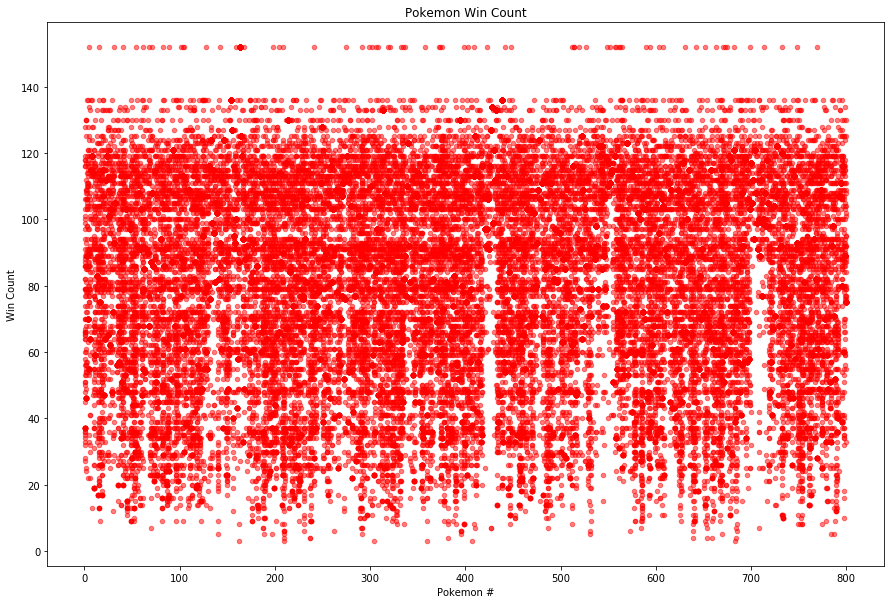

In [315]:
combats_df.plot(kind='scatter', x='#', y='Win Count', alpha=.5, color='red')
plt.xlabel('Pokemon #')
plt.ylabel('Win Count')

plt.title('Pokemon Win Count')

plt.show()

In [182]:
#for k in range(len(pokemon_df)):
#    print(won_df(k))

In [183]:
from PIL import Image
im = Image.open("pokemon_montage.png")

pokemon_images = []
y = 0
x = 0
i = 0
for k in range(835):
    i = k % 40
    if (k % 40 == 0):
        y += 126.75
    x = i*126
    crop_rectangle = (x, y-126.75, x+126, y)
    cropped_im = im.crop(crop_rectangle)
    pokemon_images.append(cropped_im)



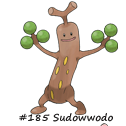

In [184]:
pokemon_images[200]

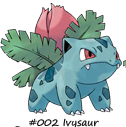

In [185]:
pokemon_images[1]

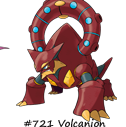

In [186]:
pokemon_images[834]

In [187]:
print(list(result))

['#', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Battle Pokemon', 'Winner']


## implement one hot encode
### it removed the NaN values from type 2

In [25]:
from sklearn.preprocessing import OneHotEncoder

cat_features = ['Type 1', 'Type 2', 'Battle Pokemon']

new_data_frame = pd.get_dummies(result, columns = cat_features)
new_data_frame

#  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Winner  Type 1_Bug  \
0        1  45      49       49       65       65     45   679.0           0   
1        1  45      49       49       65       65     45   687.0           0   
2        1  45      49       49       65       65     45   557.0           0   
3        1  45      49       49       65       65     45   766.0           0   
4        1  45      49       49       65       65     45   153.0           0   
5        1  45      49       49       65       65     45     1.0           0   
6        1  45      49       49       65       65     45   604.0           0   
7        1  45      49       49       65       65     45     1.0           0   
8        1  45      49       49       65       65     45     1.0           0   
9        1  45      49       49       65       65     45   717.0           0   
10       1  45      49       49       65       65     45   381.0           0   
11       1  45      49       49       65       65     45    54.0           0   
12       1  45      49       49       65       65     45     1.0           0   
13       1  45      49       49       65       65     45     1.0           0   
14       1  45      49       49       65       65     45   493.0           0   
15       1  45      49       49       65       65     45   115.0           0   
16       1  45      49       49       65       65     45   351.0           0   
17       1  45      49       49       65       65     45     1.0           0   
18       1  45      49       49       65       65     45   488.0           0   
19       1  45      49       49       65       65     45   503.0           0   
20       1  45      49       49       65       65     45   483.0           0   
21       1  45      49       49       65       65     45     1.0           0   
22       1  45      49       49       65       65     45   372.0           0   
23       1  45      49       49       65       65     45   649.0           0   
24       1  45      49       49       65       65     45   185.0           0   
25       1  45      49       49       65       65     45   112.0           0   
26       1  45      49       49       65       65     45     6.0           0   
27       1  45      49       49       65       65     45     1.0           0   
28       1  45      49       49       65       65     45   714.0           0   
29       1  45      49       49       65       65     45   162.0           0   
...    ...  ..     ...      ...      ...      ...    ...     ...         ...   
49986  800  80     110      120      130       90     70   758.0           0   
49987  800  80     110      120      130       90     70   800.0           0   
49988  800  80     110      120      130       90     70   800.0           0   
49989  800  80     110      120      130       90     70   800.0           0   
49990  800  80     110      120      130       90     70   800.0           0   
49991  800  80     110      120      130       90     70   800.0           0   
49992  800  80     110      120      130       90     70   800.0           0   
49993  800  80     110      120      130       90     70   800.0           0   
49994  800  80     110      120      130       90     70   800.0           0   
49995  800  80     110      120      130       90     70   280.0           0   
49996  800  80     110      120      130       90     70   474.0           0   
49997  800  80     110      120      130       90     70   800.0           0   
49998  800  80     110      120      130       90     70   800.0           0   
49999  800  80     110      120      130       90     70   800.0           0   
50000  800  80     110      120      130       90     70   623.0           0   
50001  800  80     110      120      130       90     70   800.0           0   
50002  800  80     110      120      130       90     70   472.0           0   
50003  800  80     110      120      130       90     70    62.0           0   
50004  80

In [26]:
new_data_frame.isnull().sum()

#                        0
HP                       0
Attack                   0
Defense                  0
Sp. Atk                  0
Sp. Def                  0
Speed                    0
Winner                  16
Type 1_Bug               0
Type 1_Dark              0
Type 1_Dragon            0
Type 1_Electric          0
Type 1_Fairy             0
Type 1_Fighting          0
Type 1_Fire              0
Type 1_Flying            0
Type 1_Ghost             0
Type 1_Grass             0
Type 1_Ground            0
Type 1_Ice               0
Type 1_Normal            0
Type 1_Poison            0
Type 1_Psychic           0
Type 1_Rock              0
Type 1_Steel             0
Type 1_Water             0
Type 2_Bug               0
Type 2_Dark              0
Type 2_Dragon            0
Type 2_Electric          0
                        ..
Battle Pokemon_770.0     0
Battle Pokemon_771.0     0
Battle Pokemon_772.0     0
Battle Pokemon_773.0     0
Battle Pokemon_774.0     0
Battle Pokemon_775.0     0
B

In [27]:
new_data_frame = new_data_frame.dropna()

In [28]:
new_data_frame.isnull().sum()

#                       0
HP                      0
Attack                  0
Defense                 0
Sp. Atk                 0
Sp. Def                 0
Speed                   0
Winner                  0
Type 1_Bug              0
Type 1_Dark             0
Type 1_Dragon           0
Type 1_Electric         0
Type 1_Fairy            0
Type 1_Fighting         0
Type 1_Fire             0
Type 1_Flying           0
Type 1_Ghost            0
Type 1_Grass            0
Type 1_Ground           0
Type 1_Ice              0
Type 1_Normal           0
Type 1_Poison           0
Type 1_Psychic          0
Type 1_Rock             0
Type 1_Steel            0
Type 1_Water            0
Type 2_Bug              0
Type 2_Dark             0
Type 2_Dragon           0
Type 2_Electric         0
                       ..
Battle Pokemon_770.0    0
Battle Pokemon_771.0    0
Battle Pokemon_772.0    0
Battle Pokemon_773.0    0
Battle Pokemon_774.0    0
Battle Pokemon_775.0    0
Battle Pokemon_776.0    0
Battle Pokem

In [29]:
new_data_frame.shape

(50000, 828)

In [30]:
print(list(new_data_frame.loc[:, new_data_frame.columns != 'Winner']))

#print(list(new_data_frame.columns.values))

['#', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Type 1_Bug', 'Type 1_Dark', 'Type 1_Dragon', 'Type 1_Electric', 'Type 1_Fairy', 'Type 1_Fighting', 'Type 1_Fire', 'Type 1_Flying', 'Type 1_Ghost', 'Type 1_Grass', 'Type 1_Ground', 'Type 1_Ice', 'Type 1_Normal', 'Type 1_Poison', 'Type 1_Psychic', 'Type 1_Rock', 'Type 1_Steel', 'Type 1_Water', 'Type 2_Bug', 'Type 2_Dark', 'Type 2_Dragon', 'Type 2_Electric', 'Type 2_Fairy', 'Type 2_Fighting', 'Type 2_Fire', 'Type 2_Flying', 'Type 2_Ghost', 'Type 2_Grass', 'Type 2_Ground', 'Type 2_Ice', 'Type 2_Normal', 'Type 2_Poison', 'Type 2_Psychic', 'Type 2_Rock', 'Type 2_Steel', 'Type 2_Water', 'Battle Pokemon_1.0', 'Battle Pokemon_2.0', 'Battle Pokemon_3.0', 'Battle Pokemon_4.0', 'Battle Pokemon_5.0', 'Battle Pokemon_6.0', 'Battle Pokemon_7.0', 'Battle Pokemon_8.0', 'Battle Pokemon_9.0', 'Battle Pokemon_10.0', 'Battle Pokemon_11.0', 'Battle Pokemon_13.0', 'Battle Pokemon_14.0', 'Battle Pokemon_15.0', 'Battle Pokemon_16.0', 'Battle Poke

In [31]:
from sklearn.model_selection import train_test_split

features = list(new_data_frame.loc[:, new_data_frame.columns != 'Winner'])
label = ["Winner"]

x = new_data_frame[features]
y = new_data_frame[label]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 3)

In [32]:
x_train.shape

(35000, 827)

In [33]:
y_train.shape

(35000, 1)

In [34]:
print(np.ravel(y_train))

[ 350.   93.  560. ...,  143.   28.  157.]


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train.values.ravel())
y_predict = knn.predict(x_test)

knn_accuracy = accuracy_score(y_test, y_predict)

print (knn_accuracy)


0.406666666667


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

my_logreg = LogisticRegression()
my_logreg.fit(x_train, y_train)
y_predict_lr = my_logreg.predict(x_test)

log_accuracy = accuracy_score(y_test, y_predict_lr)

print(log_accuracy)

In [58]:
my_decisiontree = DecisionTreeClassifier()
my_decisiontree.fit(x_train, y_train)
y_predict_dt = my_decisiontree.predict(x_test)

dec_tree_accuracy = accuracy_score(y_test, y_predict_dt)
print(dec_tree_accuracy)

0.8366


In [64]:
ran_forest = RandomForestClassifier(n_estimators = 10, bootstrap = True, random_state = 2)
ran_forest.fit(x_train, y_train.values.ravel())
y_predict_rf = ran_forest.predict(x_test)

rf_accuracy = accuracy_score(y_test, y_predict_rf)
print(rf_accuracy)

0.831666666667


from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF([1.0])

gaus = GaussianProcessClassifier(kernel = kernel)
gaus.fit(x_train, y_train.values.ravel())
y_predict_gaus = gaus.predict(x_test)

gaus_accuracy = accuracy_score(y_test, y_predict_gaus)
print(gaus_accuracy)

In [91]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(x_train, y_train.values.ravel())
y_predict_nb = gaussian_nb.predict(x_test)

nb_accuracy = accuracy_score(y_test, y_predict_nb)
print(nb_accuracy)

0.195066666667


In [46]:
ex_trees = ExtraTreesClassifier(random_state = 0, n_estimators = 10)
ex_trees.fit(x_train, y_train.values.ravel())
y_predict_ex_tree = ex_trees.predict(x_test)

ex_tree_accuracy = accuracy_score(y_test, y_predict_ex_tree)
print(ex_tree_accuracy)

0.833266666667


In [41]:
bag_class = BaggingClassifier()
bag_class.fit(x_train, y_train.values.ravel())
y_predict_bag = bag_class.predict(x_test)

bag_class_accuracy = accuracy_score(y_test, y_predict_bag)
print(bag_class_accuracy)

0.863266666667


In [47]:
ada_boost = AdaBoostClassifier(random_state = 0,)
ada_boost.fit(x_train, y_train.values.ravel())
y_predict_ada = ada_boost.predict(x_test)

ada_boost_accuracy = accuracy_score(y_test, y_predict_ada)
print(1 - ada_boost_accuracy)

0.986666666667


# __`combats_df`__

In [18]:
combats_df.head()

#  Battle Pokemon  Winner
0  266             298     298
1  702             701     701
2  191             668     668
3  237             683     683
4  151             231     151

#### Print shape of combats_df

In [19]:
combats_df.shape

(50000, 3)

# __`tests_df`__

In [20]:
tests_df.head()

First_pokemon  Second_pokemon
0            129             117
1            660             211
2            706             115
3            195             618
4             27             656

#### Print shape of tests_df

In [21]:
tests_df.shape

(10000, 2)